#### Transfer Learning Demo using fer2013 dataset
#### Transfer Learning Demo using VGG16 pre-trained Model

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories 

- 0=Angry
- 1=Disgust
- 2=Fear
- 3=Happy
- 4=Sad
- 5=Surprise
- 6=Neutral

The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('fer2013.csv')

In [3]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
data.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [5]:
train = data[data['Usage'] == 'Training']

In [6]:
train.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
test = data[data['Usage'] != 'Training']

In [8]:
test.head()

,emotion,pixels,Usage
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest


In [9]:
train_images = train.iloc[:, 1].values
train_labels = train.iloc[:, 0].values

In [10]:
train_images

array(['70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 5

In [11]:
train_labels

array([0, 0, 2, ..., 4, 0, 4], dtype=int64)

In [12]:
test_images = test.iloc[:, 1].values
test_labels = test.iloc[:, 0].values

In [13]:
test_images

array(['254 254 254 254 254 249 255 160 2 58 53 70 77 76 75 78 68 18 32 29 0 54 73 75 72 68 75 77 76 76 75 80 51 36 47 40 44 42 37 48 40 64 54 54 86 16 0 161 254 254 254 254 254 248 255 120 2 38 50 47 76 76 83 63 51 142 174 159 88 59 48 67 37 61 46 77 77 75 74 85 19 54 81 73 50 49 53 72 45 41 66 53 70 17 0 122 254 254 254 254 253 253 250 61 17 52 34 34 76 79 68 50 129 235 214 219 226 215 183 116 127 218 93 43 79 80 74 79 57 40 73 30 77 64 49 83 65 38 70 57 72 26 0 114 254 254 254 254 252 255 231 53 17 61 8 2 76 61 21 125 226 207 208 209 206 213 217 226 224 218 214 96 36 67 79 78 51 37 76 7 71 37 51 82 56 59 84 79 82 59 2 74 254 254 254 254 252 255 223 47 16 83 59 54 77 37 127 226 208 211 210 211 212 210 209 207 206 207 216 216 80 24 80 76 64 54 66 3 68 22 58 54 40 83 61 64 65 52 2 96 254 254 254 254 250 255 185 19 25 62 77 80 48 83 228 208 210 213 212 210 211 212 213 213 211 213 208 215 216 88 47 86 69 82 45 18 80 36 38 2 34 53 39 41 40 48 2 124 254 254 254 254 250 255 173 11 30 45 74 

In [14]:
test_labels

array([0, 1, 4, ..., 0, 3, 2], dtype=int64)

In [15]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout, Dense, Flatten

#### Build the custom model

In [16]:
def custom_model():
    model = Sequential()
    
    '''Convolutional 2D layers with 32 filters, a kernel size of (3,3), and ReLU activation function. It takes an input shape of (48,48,1), representing a 
    grayscale image of size 48x48.'''
    
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    '''Dropout layer helps prevent overfitting by randomly dropping out a fraction of the input units during training.'''
    
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    '''Dense layer with 256 units and ReLU activation is added.'''
    
    model.add(Dense(256, activation='relu'))
    
    ''' Dropout layer with a dropout rate of 0.5 is included.'''
    
    model.add(Dropout(0.5))
    
    '''Dense layer with 3 units and a softmax activation function to obtain probability distributions over the classes.'''
   
    model.add(Dense(3, activation='softmax'))
    
    return model

In [17]:
# Create the custom model
model = custom_model()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [19]:
import tensorflow as tf
import keras

In [20]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [21]:
# Save and load the model weights to 'model.h5'
model.save_weights('model.h5') 
model.load_weights('model.h5')

In [22]:
import cv2
import matplotlib.pyplot as plt

In [23]:
# Load the image of a happy face using OpenCV
out_img = cv2.imread('happy.png')
out_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

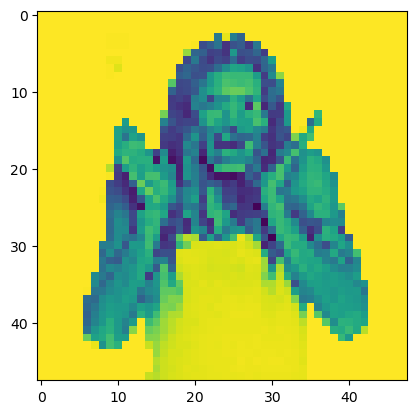

In [24]:
# Resize the image to match the input shape of the model
out = cv2.resize(out_img, (48,48))
out = out[ :, :, 0]
plt.imshow(out)

In [25]:
import numpy as np

In [26]:
# Make predictions on the preprocessed image
predictions = model.predict(np.expand_dims(out, 0)) 
predicted_class = np.argmax(predictions) 
print(predicted_class)

1/1 [==============================] - 0s 400ms/step
0


In [27]:
#Predicted class index is 0, which corresponds to the "Happy" facial expression

### Importing the Required Libraries

- The **from tensorflow.keras.utils import load_img** is used to load an image file from the file system.

- The **from tensorflow.keras.utils import img_to_array** is used to convert an image loaded with load_img into a NumPy array.

- The **from keras.applications.vgg16 import preprocess_input** is used to preprocess the input image array before feeding it to the VGG16 model. VGG16 expects the input images to be preprocessed in a specific way.

- The **from keras.applications.vgg16 import VGG16** is used to import the VGG16 model architecture. VGG16 is a popular convolutional neural network model pre-trained on the ImageNet dataset for image classification.

In [28]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16

##### Adding Classifier Layers
- It demonstrates how to load a pre-trained VGG16 model without its classifier layers and then add new custom classifier layers on top of it.
- The new model is defined by connecting the output of the pre-trained VGG16 model to a flatten layer, followed by a dense layer with 1024 units and ReLU activation, and finally a dense layer with 10 units and softmax activation for multi-class classification.
- The model summary provides an overview of the architecture and layer configurations.

In [29]:
from keras.models import Model
from keras.layers import Dense, Flatten

In [30]:
model = VGG16(include_top=False, input_shape=(300,300,3))
flat1 = Flatten()(model.layers[-1].output)
class1= Dense(1024, activation='relu')(flat1)
output = Dense(10, activation = 'softmax')(class1)

model = Model(inputs=model.inputs, outputs=output)
model.summary()

58889256/58889256 [==============================] - 12s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                             

##### Preprocessing and Feature Extraction
- The image is loaded from a file and preprocessed to meet the input requirements of the VGG16 model (resizing, converting to a numpy array, and reshaping).

- The modified model is used to predict and extract features from the input image, resulting in a feature vector with a specific shape.

In [31]:
image = load_img('dog.jpg', target_size=(224,224))
image = img_to_array(image)

In [32]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
image = preprocess_input(image)

In [33]:
model = VGG16()

553467096/553467096 [==============================] - 128s 0us/step


In [34]:
model = Model(inputs=model.inputs, outputs = model.layers[-2].output)

In [35]:
features = model.predict(image)

1/1 [==============================] - 1s 1s/step


In [36]:
print(features.shape)

(1, 4096)
